In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re 
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_dir='/content/drive/MyDrive/560 Project/Data/'

Mounted at /content/drive


In [ ]:
company_list=['AAPL','AMZN','FB','GOOGL','MSFT','TSLA']
company=company_list[0]

def load_stock_data(company):
  path = root_dir
  stock_filename=path+company+'.csv'
  stock_df=pd.read_csv(stock_filename)
  stock_df['Date']=pd.to_datetime(stock_df['Date'])
  stock_df=stock_df[stock_df['Date']>='2019-01-01']
  stock_df=stock_df[stock_df['Date']<='2021-12-31']

  return stock_df

stock_df = load_stock_data(company)
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-01,41.740002,42.244999,41.482498,41.630001,40.362049,130672400
1,2019-02-04,41.852501,42.915001,41.820000,42.812500,41.508522,125982000
2,2019-02-05,43.215000,43.770000,43.087502,43.544998,42.218719,144406400
3,2019-02-06,43.662498,43.892502,43.212502,43.560001,42.233261,112958400
4,2019-02-07,43.099998,43.485001,42.584999,42.735001,41.433388,126966800
...,...,...,...,...,...,...,...
731,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
732,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
733,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900
734,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.973251,59773000


In [ ]:
def load_tweets_df(company):
  path = root_dir
  tweets_file_name=path+company+'_tweets.csv'
  tweets_df=pd.read_csv(tweets_file_name,usecols=range(1,5))
  tweets_df.dropna(inplace=True)
  tweets_df['Datetime']=tweets_df['Datetime'].str.split(' ').str.get(0)
  tweets_df['Datetime']=pd.to_datetime(tweets_df['Datetime'])

  return tweets_df

tweets_df = load_tweets_df(company)
tweets_df

,Datetime,Tweet Id,Text,Username
0,2019-01-01,1.080251e+18,$AAPL #patent #maintenance event EXP - Patent ...,treabase
1,2019-01-01,1.080250e+18,Early to mid January performer : gs ， aapl co...,qingxia_NXP
2,2019-01-01,1.080249e+18,Join @RobinhoodApp and we'll both get a stock ...,wetthamjoe
3,2019-01-01,1.080249e+18,Video Watchlist 1-2-2019 $SPY $QQQ $XLK $XLF $...,Ascend_Trading
4,2019-01-02,1.080615e+18,@KeithMcCullough If AAPL was raising estimates...,hagara13
...,...,...,...,...
4383,2021-12-30,1.476703e+18,$aapl big PUT order placed today:\n\nsomebody ...,czqpt
4384,2021-12-31,1.477067e+18,"My Portfolio(2022年1月1日現在)\n$TSLA, $AAPL, $NVDA...",segozi_surfing
4385,2021-12-31,1.477066e+18,"$AAPL 🍏 In the “final second” of the Close, 8...",condensely
4386,2021-12-31,1.477066e+18,"誤差のようなものだけど、 $VOO &gt; $QQQ となったのは驚き。\n$AAPL, ...",_slapper


In [ ]:
def cleanText(text):
  text=re.sub(r'@[A-Za-z0-9_]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT :','',text)
  text=re.sub(r'https?://[A-Za-z0-9./]+','',text)
  text=re.sub(r'\n',' ',text)
  text=re.sub(r'  ',' ',text)

  return text

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getClass(polarity):
  if polarity<0:
    return 'negative'
  if polarity==0:
    return 'neutral'
  if polarity>0:
    return 'positive'

tweets_df['Text']=tweets_df['Text'].apply(cleanText)
tweets_df['Subjectivity']=tweets_df['Text'].apply(getSubjectivity)
tweets_df['Polarity']=tweets_df['Text'].apply(getPolarity)
tweets_df['Class']=tweets_df['Polarity'].apply(getClass)
tweets_df

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity,Class
0,2019-01-01,1.080251e+18,$AAPL patent maintenance event EXP - Patent Ex...,treabase,0.300000,-0.316667,negative
1,2019-01-01,1.080250e+18,Early to mid January performer : gs ， aapl cou...,qingxia_NXP,0.150000,0.050000,positive
2,2019-01-01,1.080249e+18,"Join and we'll both get a stock like $AAPL, $F...",wetthamjoe,0.844444,0.450000,positive
3,2019-01-01,1.080249e+18,Video Watchlist 1-2-2019 $SPY $QQQ $XLK $XLF $...,Ascend_Trading,0.000000,0.000000,neutral
4,2019-01-02,1.080615e+18,If AAPL was raising estimates Cramer would be...,hagara13,0.785714,0.116071,positive
...,...,...,...,...,...,...,...
4383,2021-12-30,1.476703e+18,$aapl big PUT order placed today: somebody bou...,czqpt,0.100000,0.000000,neutral
4384,2021-12-31,1.477067e+18,"My Portfolio(2022年1月1日現在) $TSLA, $AAPL, $NVDA,...",segozi_surfing,0.500000,0.500000,positive
4385,2021-12-31,1.477066e+18,"$AAPL 🍏 In the “final second” of the Close, 8 ...",condensely,0.637576,0.280758,positive
4386,2021-12-31,1.477066e+18,"誤差のようなものだけど、 $VOO &gt; $QQQ となったのは驚き。 $AAPL, $...",_slapper,0.000000,0.000000,neutral


In [ ]:
def mergeData(stock_df,tweets_df,split_date='2021-07-31'):
  merge_df = stock_df.copy()
  for i in range(0,len(stock_df)):
    cur_time = stock_df.iloc[i,:]['Date']
    idx = tweets_df['Datetime'] == cur_time
    tweets_sub = tweets_df.loc[idx]

    tweets_sub['len_chars'] = tweets_sub['Text'].apply(len)
    merge_df.loc[i,'len_chars'] = tweets_sub['len_chars'].mean()
    merge_df.loc[i,'polarity'] = tweets_sub['Polarity'].mean()
    merge_df.loc[i,'subjectivity'] = tweets_sub['Subjectivity'].mean()
    merge_df.loc[i,'num_positive'] = tweets_sub.loc[tweets_sub['Class']=='positive',:].shape[0]
    merge_df.loc[i,'num_negative'] = tweets_sub.loc[tweets_sub['Class']=='negative',:].shape[0]
    merge_df.loc[i,'ratio_positive'] = merge_df.loc[i,'num_positive']/tweets_sub.shape[0]
    merge_df.loc[i,'ratio_negative'] = merge_df.loc[i,'num_negative']/tweets_sub.shape[0]

  merge_df.dropna(inplace=True)
  merge_df.set_index('Date',inplace=True)

  train_df = merge_df.loc[merge_df.index<=split_date]
  test_df = merge_df.loc[merge_df.index>split_date]
  return train_df,test_df

split_date = '2021-7-31'
train_df,test_df = mergeData(stock_df,tweets_df,split_date)
train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,len_chars,polarity,subjectivity,num_positive,num_negative,ratio_positive,ratio_negative
Date,,,,,,,,,,,,,
2019-02-01,41.740002,42.244999,41.482498,41.630001,40.362049,130672400,119.00,0.304167,0.356944,2.0,0.0,0.50,0.00
2019-02-04,41.852501,42.915001,41.820000,42.812500,41.508522,125982000,101.00,0.350000,0.547222,3.0,0.0,0.75,0.00
2019-02-05,43.215000,43.770000,43.087502,43.544998,42.218719,144406400,103.50,0.041146,0.260937,1.0,1.0,0.25,0.25
2019-02-06,43.662498,43.892502,43.212502,43.560001,42.233261,112958400,150.25,0.145387,0.374107,3.0,0.0,0.75,0.00
2019-02-07,43.099998,43.485001,42.584999,42.735001,41.433388,126966800,101.00,0.075000,0.181944,2.0,0.0,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,148.270004,149.830002,147.699997,148.990005,148.361282,72434100,101.75,-0.100694,0.300000,0.0,2.0,0.00,0.50
2021-07-27,149.119995,149.210007,145.550003,146.770004,146.150650,104818600,183.50,0.075000,0.487500,1.0,0.0,0.25,0.00
2021-07-28,144.809998,146.970001,142.539993,144.979996,144.368195,118931200,65.00,0.125000,0.125000,1.0,0.0,0.25,0.00


In [ ]:
train = train_df
scalers={}

for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s

test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

In [ ]:
train_df

,Open,High,Low,Close,Adj Close,Volume,len_chars,polarity,subjectivity,num_positive,num_negative,ratio_positive,ratio_negative
Date,,,,,,,,,,,,,
2019-02-01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.552701,-0.219917,0.322449,-0.154605,0.0,-1.000000,0.0,-1.000000
2019-02-04,-0.997907,-0.987564,-0.993645,-0.978004,-0.978800,-0.577318,-0.369295,0.412245,0.296053,0.5,-1.000000,0.5,-1.000000
2019-02-05,-0.972558,-0.971695,-0.969779,-0.964379,-0.965668,-0.480618,-0.348548,-0.192857,-0.381990,-0.5,-0.333333,-0.5,-0.333333
2019-02-06,-0.964233,-0.969421,-0.967425,-0.964100,-0.965399,-0.645672,0.039419,0.011370,-0.113957,0.5,-1.000000,0.5,-1.000000
2019-02-07,-0.974698,-0.976985,-0.979241,-0.979446,-0.980189,-0.572149,-0.369295,-0.126531,-0.569079,0.0,-1.000000,0.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,0.981953,0.996845,1.000000,0.997024,0.997054,-0.858364,-0.363071,-0.470748,-0.289474,-1.0,0.333333,-1.0,0.333333
2021-07-27,0.997767,0.985337,0.959517,0.955729,0.956176,-0.688394,0.315353,-0.126531,0.154605,-0.5,-1.000000,-0.5,-1.000000
2021-07-28,0.917581,0.943761,0.902841,0.922433,0.923216,-0.614324,-0.668050,-0.028571,-0.703947,-0.5,-1.000000,-0.5,-1.000000


In [ ]:
test_df

,Open,High,Low,Close,Adj Close,Volume,len_chars,polarity,subjectivity,num_positive,num_negative,ratio_positive,ratio_negative
Date,,,,,,,,,,,,,
2021-08-02,0.946419,0.943390,0.953868,0.932478,0.933160,-0.908508,-0.170124,-0.444898,-0.515214,-1.0,0.333333,-1.0,0.333333
2021-08-03,0.936186,0.963621,0.952550,0.966704,0.967040,-0.898502,-0.201245,-0.050015,-0.059341,0.0,-1.000000,0.0,-1.000000
2021-08-04,0.963349,0.958981,0.973262,0.959077,0.959491,-0.942685,-0.095436,-0.259184,-0.844572,-0.5,-1.000000,-0.5,-1.000000
2021-08-05,0.957953,0.959909,0.971191,0.961124,0.961516,-0.995016,-0.132780,-0.028571,0.184211,-0.5,-1.000000,-0.5,-1.000000
2021-08-06,0.946233,0.946360,0.961024,0.944011,0.948608,-0.954761,0.139004,-0.328061,-0.331414,0.0,-0.333333,0.0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.518139,1.564614,1.553016,1.579985,1.583956,-0.845319,-0.715768,-0.216475,-0.511782,-0.5,-0.333333,-0.5,-0.333333
2021-12-28,1.575256,1.581504,1.580507,1.560640,1.564750,-0.823145,-0.400415,-0.273469,-1.000000,-1.0,-1.000000,-1.0,-1.000000
2021-12-29,1.559814,1.568512,1.573164,1.562314,1.566412,-0.911296,-0.462656,-0.285714,-0.792763,-1.0,-0.333333,-1.0,-0.333333


In [ ]:
def get_train_test_data(train_df,test_df,step_size=60,target_size=1):
    sub_col = range(train_df.shape[1])
    train_data = train_df.iloc[:,sub_col].copy()
    test_data = test_df.iloc[:,sub_col].copy()
    scaler = MinMaxScaler()
    train_data = scaler.fit_transform(train_data)
    train_data = np.array(train_data)
    X_train = []
    y_train = []
    for i in range(step_size,train_data.shape[0]-target_size):
        X_train.append(train_data[i-step_size:i]) 
        y_train.append(train_data[i:i+target_size,3])
        # print(train_data[i:i+target_size,3])
        
    X_train,y_train = np.array(X_train),np.array(y_train)
    
    train_data = train_df.iloc[:,sub_col].copy()
    past_step_days = train_data.tail(step_size)
    test_data = past_step_days.append(test_data,ignore_index=True)
    test_data = scaler.transform(test_data)
    test_data = np.array(test_data)
    X_test = []
    y_test = []
    for i in range(step_size,test_data.shape[0]):
        X_test.append(test_data[i-step_size:i])
        y_test.append(test_data[i,3])
    X_test,y_test = np.array(X_test),np.array(y_test)

    return X_train,y_train,X_test,y_test,scaler

step_size=2
target_size=2
X_train,y_train,X_test,y_test,scaler = get_train_test_data(train_df,test_df,step_size,target_size)

In [ ]:
X_train_x= X_train.reshape(X_train.shape[0], -1)
X_test_x= X_test.reshape(X_test.shape[0], -1)
X_train.shape

(625, 2, 13)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train_x, y_train)

XGBRegressor(n_estimators=1000, objective='reg:squarederror')

In [ ]:
yhat = model.predict(X_test_x)
print('Input: %s, Predicted: %.3f' % (X_test[0], yhat[0]))

Input: [[0.95767439 0.96798295 0.97062636 0.96735496 0.96768468 0.02952669
  0.25829876 0.45260771 0.23574561 0.5        0.         0.5
  0.        ]
 [0.9547907  0.96594127 0.96620146 0.9694011  0.96971014 0.06543292
  0.60165975 0.54886297 0.88886278 0.75       0.33333333 0.75
  0.33333333]], Predicted: 0.267


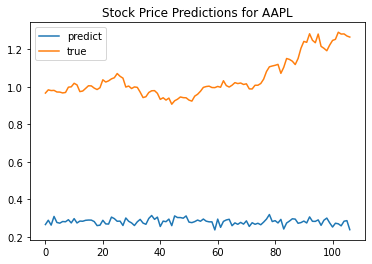

In [ ]:
plt.plot(yhat,label='predict')
plt.plot(y_test,label='true')
plt.title('Stock Price Predictions for '+company)
plt.legend()
plt.show()

In [ ]:
!pip install keras_tuner

     |████████████████████████████████| 133 kB 14.1 MB/s 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore')

In [ ]:
def build_model(hp):
    model = Sequential()
    num_hidden = hp.Int('num_hidden',min_value=0,max_value=3)

    model.add(LSTM(
        units=hp.Int('num_units',min_value=17,max_value=500,step=50),
        activation='relu',
        return_sequences=True if num_hidden>0 else False,
        input_shape=(X_train.shape[1],X_train.shape[2])
    ))
    if num_hidden>0:
        for num_layer in range(num_hidden):
            model.add(Dropout(
                hp.Float('rate_dropout_hidden'+str(num_layer+1),min_value=0.05,max_value=0.95,step=0.05)
            ))
            model.add(LSTM(
                units=hp.Int('num_units_hidden'+str(num_layer+1),min_value=17,max_value=250,step=50),
                activation='relu',
                return_sequences=True if num_layer+1!=num_hidden else False
            ))
    
    model.add(Dropout(
            hp.Float('rate_dropout',min_value=0.05,max_value=0.95,step=0.05)
        ))
    
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')

    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss', 
    max_trials=5,
    seed=0,   
    executions_per_trial=3,
    directory= root_dir+'Stock Price Predictions for '+company,
    project_name= root_dir+'Stock Price Predictions for '+company
    )

callback=EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)
tuner.search(
    x=X_train,
    y=y_train,
    verbose=1,
    epochs=500,
    batch_size=64,
    callbacks=[callback],
    validation_data=(X_test, y_test)
    )

INFO:tensorflow:Reloading Oracle from existing project /content/drive/MyDrive/560 Project/Data/Stock Price Predictions for AAPL/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/MyDrive/560 Project/Data/Stock Price Predictions for AAPL/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save(company+'AAPL_step_2.h5')
print('best model for {} is saved' .format(company))
print(best_model.summary())

best_hyperparameters = tuner.get_best_hyperparameters()[0].values
print(best_hyperparameters)

best_loss = best_model.evaluate(X_test, y_test)
print(best_loss)

best model for AAPL is saved
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 167)               120908    
                                                                 
 dropout (Dropout)           (None, 167)               0         
                                                                 
 dense (Dense)               (None, 1)                 168       
                                                                 
Total params: 121,076
Trainable params: 121,076
Non-trainable params: 0
_________________________________________________________________
None
{'num_hidden': 0, 'num_units': 167, 'rate_dropout': 0.25, 'rate_dropout_hidden1': 0.7000000000000001, 'num_units_hidden1': 217, 'rate_dropout_hidden2': 0.3, 'num_units_hidden2': 167}
4/4 [==============================] - 0s 4ms/step - loss: 5.5738e-04
0.0005573823000304401


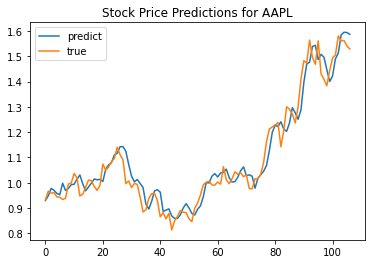

In [ ]:
y_pred_list=[]
y_true_list=[]
y_pred = best_model.predict(X_test)
y_pred_df = scaler.transform(test_df)
y_pred_df[:,3] = y_pred[:,0]
y_pred = pd.DataFrame(scaler.inverse_transform(y_pred_df))[3]

y_true = test_df.values[:,3]

y_pred_list.append(y_pred)
y_true_list.append(y_true)
plt.plot(y_pred,label='predict')
plt.plot(y_true,label='true')
plt.title('Stock Price Predictions for '+company)
plt.legend()
plt.show()

In [ ]:
X_train,y_train,X_test,y_test,scaler = get_train_test_data(train_df,test_df,3,3)

[0.01795015 0.01027716 0.00904483]
[0.01027716 0.00904483 0.00676616]
[0.00904483 0.00676616 0.01016089]
[0.00676616 0.01016089 0.00851002]
[0.01016089 0.00851002 0.00995164]
[0.00851002 0.00995164 0.00906807]
[0.00995164 0.00906807 0.01025388]
[0.00906807 0.01025388 0.01281156]
[0.01025388 0.01281156 0.01055616]
[0.01281156 0.01055616 0.0149972 ]
[0.01055616 0.0149972  0.01792688]
[0.0149972  0.01792688 0.0181594 ]
[0.01792688 0.0181594  0.01941498]
[0.0181594  0.01941498 0.01541571]
[0.01941498 0.01541571 0.0196475 ]
[0.01541571 0.0196475  0.02169365]
[0.0196475  0.02169365 0.02094958]
[0.02169365 0.02094958 0.01860119]
[0.02094958 0.01860119 0.01390438]
[0.01860119 0.01390438 0.0148577 ]
[0.01390438 0.0148577  0.02878532]
[0.0148577  0.02878532 0.03345889]
[0.02878532 0.03345889 0.03531902]
[0.03345889 0.03531902 0.0400158 ]
[0.03531902 0.0400158  0.0455729 ]
[0.0400158 0.0455729 0.0499907]
[0.0455729  0.0499907  0.04652622]
[0.0499907  0.04652622 0.05031622]
[0.04652622 0.05031622 

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

best_model.save('AAPL_step_3.h5')
print('best model for {} is saved' .format(company))
print(best_model.summary())

best_hyperparameters = tuner.get_best_hyperparameters()[0].values
print(best_hyperparameters)

best_loss = best_model.evaluate(X_test, y_test)
print(best_loss)

best model for AAPL is saved
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 167)               120908    
                                                                 
 dropout (Dropout)           (None, 167)               0         
                                                                 
 dense (Dense)               (None, 1)                 168       
                                                                 
Total params: 121,076
Trainable params: 121,076
Non-trainable params: 0
_________________________________________________________________
None
{'num_hidden': 0, 'num_units': 167, 'rate_dropout': 0.25, 'rate_dropout_hidden1': 0.7000000000000001, 'num_units_hidden1': 217, 'rate_dropout_hidden2': 0.3, 'num_units_hidden2': 167}
4/4 [==============================] - 0s 4ms/step - loss: 0.0563
0.05632535368204117


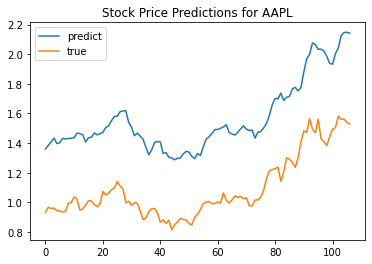

In [ ]:
y_pred_list=[]
y_true_list=[]
y_pred = best_model.predict(X_test)
y_pred_df = scaler.transform(test_df)
y_pred_df[:,3] = y_pred[:,0]
y_pred = pd.DataFrame(scaler.inverse_transform(y_pred_df))[3]

y_true = test_df.values[:,3]

y_pred_list.append(y_pred)
y_true_list.append(y_true)
plt.plot(y_pred,label='predict')
plt.plot(y_true,label='true')
plt.title('Stock Price Predictions for '+company)
plt.legend()
plt.show()

In [ ]:
y_pred

0      1.359278
1      1.384755
2      1.408341
3      1.433045
4      1.396721
         ...   
102    2.041594
103    2.125670
104    2.145737
105    2.148094
106    2.141842
Name: 3, Length: 107, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import pandas as pd


AAPL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      70.284117
1      72.742709
2      69.955165
3      74.916454
4      71.465681
         ...    
102    70.710997
103    69.538158
104    72.187409
105    72.513419
106    67.335751
Name: 3, Length: 107, dtype: float64


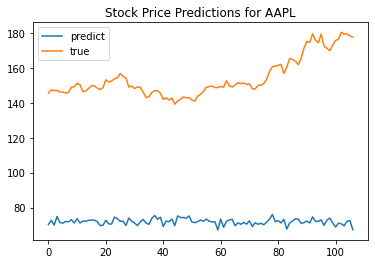

AMZN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      2097.738186
1      1833.698462
2      1863.564258
3      1896.601431
4      1929.659084
          ...     
102    1933.830513
103    1864.072796
104    1889.666825
105    1902.133703
106    1959.881947
Name: 3, Length: 107, dtype: float64


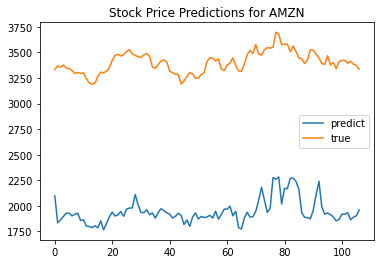

FB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      170.382804
1      163.275685
2      170.548455
3      168.399026
4      173.756877
          ...    
102    157.896562
103    171.958013
104    169.746302
105    171.988376
106    176.688505
Name: 3, Length: 107, dtype: float64


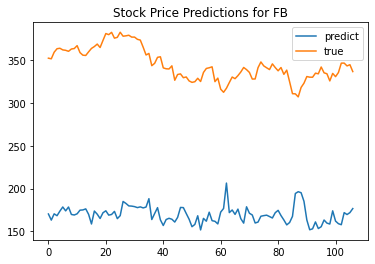

GOOGL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      1307.150212
1      1349.927843
2      1303.773735
3      1316.653665
4      1358.990854
          ...     
102    1326.028069
103    1339.194577
104    1365.286300
105    1323.348928
106    1353.690683
Name: 3, Length: 107, dtype: float64


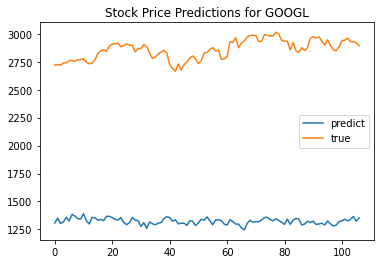

MSFT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      176.184376
1      175.872676
2      176.317304
3      173.795502
4      173.186087
          ...    
102    176.828441
103    175.439232
104    178.010766
105    178.677761
106    174.658113
Name: 3, Length: 107, dtype: float64


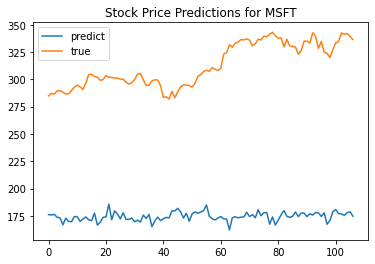

TSLA


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      132.557828
1      144.221824
2      136.480227
3      134.339566
4      142.550611
          ...    
102    111.715483
103    112.730387
104    107.386157
105    109.357432
106    119.372209
Name: 3, Length: 107, dtype: float64


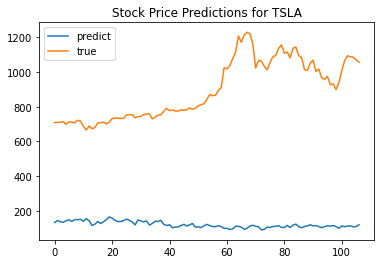

In [ ]:

def load_stock_data(company):
  path = root_dir
  stock_filename=path+company+'.csv'
  stock_df=pd.read_csv(stock_filename)
  stock_df['Date']=pd.to_datetime(stock_df['Date'])
  stock_df=stock_df[stock_df['Date']>='2019-01-01']
  stock_df=stock_df[stock_df['Date']<='2021-12-31']

  return stock_df


def load_tweets_df(company):
  path = root_dir
  tweets_file_name=path+company+'_tweets.csv'
  tweets_df=pd.read_csv(tweets_file_name,usecols=range(1,5))
  tweets_df.dropna(inplace=True)
  tweets_df['Datetime']=tweets_df['Datetime'].str.split(' ').str.get(0)
  tweets_df['Datetime']=pd.to_datetime(tweets_df['Datetime'])

  return tweets_df


def cleanText(text):
  text=re.sub(r'@[A-Za-z0-9_]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT :','',text)
  text=re.sub(r'https?://[A-Za-z0-9./]+','',text)
  text=re.sub(r'\n',' ',text)
  text=re.sub(r'  ',' ',text)

  return text

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getClass(polarity):
  if polarity<0:
    return 'negative'
  if polarity==0:
    return 'neutral'
  if polarity>0:
    return 'positive'

def mergeData(stock_df,tweets_df,split_date='2021-07-31'):
  merge_df = stock_df.copy()
  for i in range(0,len(stock_df)):
    cur_time = stock_df.iloc[i,:]['Date']
    idx = tweets_df['Datetime'] == cur_time
    tweets_sub = tweets_df.loc[idx]

    tweets_sub['len_chars'] = tweets_sub['Text'].apply(len)
    merge_df.loc[i,'len_chars'] = tweets_sub['len_chars'].mean()
    merge_df.loc[i,'polarity'] = tweets_sub['Polarity'].mean()
    merge_df.loc[i,'subjectivity'] = tweets_sub['Subjectivity'].mean()
    merge_df.loc[i,'num_positive'] = tweets_sub.loc[tweets_sub['Class']=='positive',:].shape[0]
    merge_df.loc[i,'num_negative'] = tweets_sub.loc[tweets_sub['Class']=='negative',:].shape[0]
    merge_df.loc[i,'ratio_positive'] = merge_df.loc[i,'num_positive']/tweets_sub.shape[0]
    merge_df.loc[i,'ratio_negative'] = merge_df.loc[i,'num_negative']/tweets_sub.shape[0]

  merge_df.dropna(inplace=True)
  merge_df.set_index('Date',inplace=True)

  train_df = merge_df.loc[merge_df.index<=split_date]
  test_df = merge_df.loc[merge_df.index>split_date]
  return train_df,test_df



def get_train_test_data(train_df,test_df,step_size=60,target_size=1):
    sub_col = range(train_df.shape[1])
    train_data = train_df.iloc[:,sub_col].copy()
    test_data = test_df.iloc[:,sub_col].copy()
    scaler = MinMaxScaler()
    train_data = scaler.fit_transform(train_data)
    train_data = np.array(train_data)
    X_train = []
    y_train = []
    for i in range(step_size,train_data.shape[0]-target_size):
        X_train.append(train_data[i-step_size:i]) 
        y_train.append(train_data[i:i+target_size,3])
  
        
    X_train,y_train = np.array(X_train),np.array(y_train)
    
    train_data = train_df.iloc[:,sub_col].copy()
    past_step_days = train_data.tail(step_size)
    test_data = past_step_days.append(test_data,ignore_index=True)
    test_data = scaler.transform(test_data)
    test_data = np.array(test_data)
    X_test = []
    y_test = []
    for i in range(step_size,test_data.shape[0]):
        X_test.append(test_data[i-step_size:i])
        y_test.append(test_data[i,3])
    X_test,y_test = np.array(X_test),np.array(y_test)

    return X_train,y_train,X_test,y_test,scaler


y_pred_list=[]
y_true_list=[]
company_list=['AAPL','AMZN','FB','GOOGL','MSFT','TSLA']

for company in company_list:
    print(company)
    ## Load Stock and Tweets Data
    stock_df = load_stock_data(company)
    tweets_df = load_tweets_df(company)
    ## Process Tweets Data
    tweets_df['Text']=tweets_df['Text'].apply(cleanText)
    tweets_df['Subjectivity']=tweets_df['Text'].apply(getSubjectivity)
    tweets_df['Polarity']=tweets_df['Text'].apply(getPolarity)
    tweets_df['Class']=tweets_df['Polarity'].apply(getClass)
    ## Merge Stock and Tweets Data
    split_date = '2021-07-31'
    train_df,test_df = mergeData(stock_df,tweets_df,split_date)
    ## Get Train and Test Data
    step_size=2
    X_train,y_train,X_test,y_test,scaler = get_train_test_data(train_df,test_df,step_size,2)
    X_train_x= X_train.reshape(X_train.shape[0], -1)
    X_test_x= X_test.reshape(X_test.shape[0], -1)
    
    ## Build Model and RandomSearch Best Hyperparameters
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(X_train_x, y_train)

    y_pred = model.predict(X_test_x)

    y_pred_df = scaler.transform(test_df)
    y_pred_df[:,3] = y_pred
    y_pred = pd.DataFrame(scaler.inverse_transform(y_pred_df))[3]
    print(y_pred)
    y_true = test_df.values[:,3]

    y_pred_list.append(y_pred)
    y_true_list.append(y_true)
    plt.plot(y_pred,label='predict')
    plt.plot(y_true,label='true')
    plt.title('Stock Price Predictions for '+company)
    plt.legend()
    plt.show()

In [ ]:
for i in range(6):
  print(mean_squared_error(y_true=y_true_list[i],
                   y_pred=y_pred_list[i]))

6887.414814625606
2128816.119884057
30982.30746412599
2366924.211155221
19486.679131407924
632604.7942194202


AAPL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      67.833761
1      64.804661
2      66.032130
3      63.174287
4      66.820563
         ...    
102    65.328988
103    65.204848
104    66.663838
105    65.079199
106    66.203072
Name: 3, Length: 107, dtype: float64


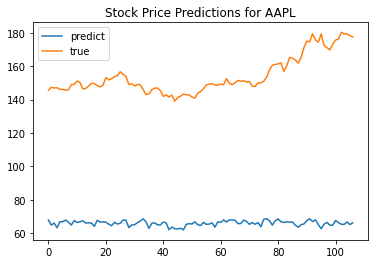

AMZN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      1768.974054
1      1756.382103
2      1750.227857
3      1780.921489
4      1735.053191
          ...     
102    1821.226464
103    1781.882178
104    1760.312828
105    1804.784710
106    1738.822670
Name: 3, Length: 107, dtype: float64


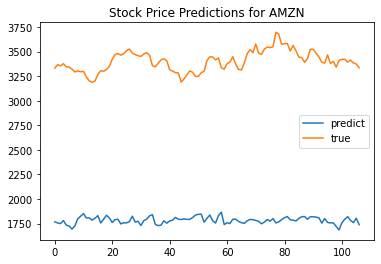

FB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      191.945582
1      193.599520
2      192.832928
3      192.656825
4      192.007172
          ...    
102    187.287665
103    187.145510
104    190.349001
105    195.011144
106    190.922502
Name: 3, Length: 107, dtype: float64


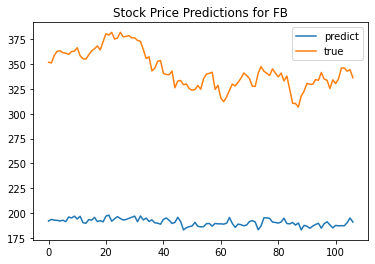

GOOGL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      1288.531396
1      1291.221898
2      1299.063210
3      1281.151677
4      1303.471870
          ...     
102    1298.538847
103    1285.153558
104    1290.213222
105    1291.201481
106    1278.460861
Name: 3, Length: 107, dtype: float64


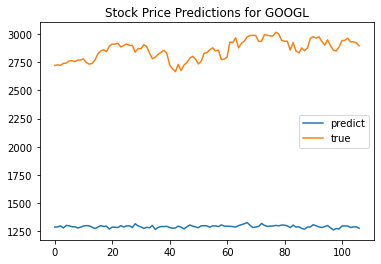

MSFT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      151.766313
1      150.127351
2      150.266539
3      152.472330
4      150.781998
          ...    
102    149.942413
103    149.694726
104    150.163766
105    150.611118
106    150.974545
Name: 3, Length: 107, dtype: float64


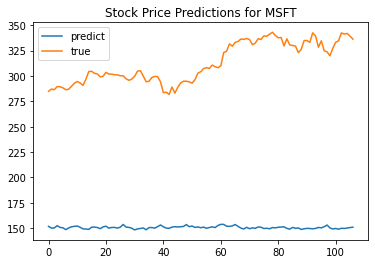

TSLA


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      51.671694
1      48.417775
2      53.043349
3      56.779368
4      56.903479
         ...    
102    48.907727
103    49.569162
104    50.861579
105    50.413569
106    54.324908
Name: 3, Length: 107, dtype: float64


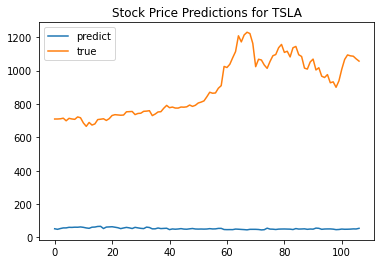

In [ ]:

def load_stock_data(company):
  path = root_dir
  stock_filename=path+company+'.csv'
  stock_df=pd.read_csv(stock_filename)
  stock_df['Date']=pd.to_datetime(stock_df['Date'])
  stock_df=stock_df[stock_df['Date']>='2019-01-01']
  stock_df=stock_df[stock_df['Date']<='2021-12-31']

  return stock_df


def load_tweets_df(company):
  path = root_dir
  tweets_file_name=path+company+'_tweets.csv'
  tweets_df=pd.read_csv(tweets_file_name,usecols=range(1,5))
  tweets_df.dropna(inplace=True)
  tweets_df['Datetime']=tweets_df['Datetime'].str.split(' ').str.get(0)
  tweets_df['Datetime']=pd.to_datetime(tweets_df['Datetime'])

  return tweets_df


def cleanText(text):
  text=re.sub(r'@[A-Za-z0-9_]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT :','',text)
  text=re.sub(r'https?://[A-Za-z0-9./]+','',text)
  text=re.sub(r'\n',' ',text)
  text=re.sub(r'  ',' ',text)

  return text

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getClass(polarity):
  if polarity<0:
    return 'negative'
  if polarity==0:
    return 'neutral'
  if polarity>0:
    return 'positive'

def mergeData(stock_df,tweets_df,split_date='2021-07-31'):
  merge_df = stock_df.copy()
  for i in range(0,len(stock_df)):
    cur_time = stock_df.iloc[i,:]['Date']
    idx = tweets_df['Datetime'] == cur_time
    tweets_sub = tweets_df.loc[idx]

    tweets_sub['len_chars'] = tweets_sub['Text'].apply(len)
    merge_df.loc[i,'len_chars'] = tweets_sub['len_chars'].mean()
    merge_df.loc[i,'polarity'] = tweets_sub['Polarity'].mean()
    merge_df.loc[i,'subjectivity'] = tweets_sub['Subjectivity'].mean()
    merge_df.loc[i,'num_positive'] = tweets_sub.loc[tweets_sub['Class']=='positive',:].shape[0]
    merge_df.loc[i,'num_negative'] = tweets_sub.loc[tweets_sub['Class']=='negative',:].shape[0]
    merge_df.loc[i,'ratio_positive'] = merge_df.loc[i,'num_positive']/tweets_sub.shape[0]
    merge_df.loc[i,'ratio_negative'] = merge_df.loc[i,'num_negative']/tweets_sub.shape[0]

  merge_df.dropna(inplace=True)
  merge_df.set_index('Date',inplace=True)

  train_df = merge_df.loc[merge_df.index<=split_date]
  test_df = merge_df.loc[merge_df.index>split_date]
  return train_df,test_df



def get_train_test_data(train_df,test_df,step_size=60,target_size=1):
    sub_col = range(train_df.shape[1])
    train_data = train_df.iloc[:,sub_col].copy()
    test_data = test_df.iloc[:,sub_col].copy()
    scaler = MinMaxScaler()
    train_data = scaler.fit_transform(train_data)
    train_data = np.array(train_data)
    X_train = []
    y_train = []
    for i in range(step_size,train_data.shape[0]-target_size):
        X_train.append(train_data[i-step_size:i]) 
        y_train.append(train_data[i:i+target_size,3])
  
        
    X_train,y_train = np.array(X_train),np.array(y_train)
    
    train_data = train_df.iloc[:,sub_col].copy()
    past_step_days = train_data.tail(step_size)
    test_data = past_step_days.append(test_data,ignore_index=True)
    test_data = scaler.transform(test_data)
    test_data = np.array(test_data)
    X_test = []
    y_test = []
    for i in range(step_size,test_data.shape[0]):
        X_test.append(test_data[i-step_size:i])
        y_test.append(test_data[i,3])
    X_test,y_test = np.array(X_test),np.array(y_test)

    return X_train,y_train,X_test,y_test,scaler


y_pred_list=[]
y_true_list=[]
company_list=['AAPL','AMZN','FB','GOOGL','MSFT','TSLA']

for company in company_list:
    print(company)
    ## Load Stock and Tweets Data
    stock_df = load_stock_data(company)
    tweets_df = load_tweets_df(company)
    ## Process Tweets Data
    tweets_df['Text']=tweets_df['Text'].apply(cleanText)
    tweets_df['Subjectivity']=tweets_df['Text'].apply(getSubjectivity)
    tweets_df['Polarity']=tweets_df['Text'].apply(getPolarity)
    tweets_df['Class']=tweets_df['Polarity'].apply(getClass)
    ## Merge Stock and Tweets Data
    split_date = '2021-07-31'
    train_df,test_df = mergeData(stock_df,tweets_df,split_date)
    ## Get Train and Test Data
    step_size=2
    X_train,y_train,X_test,y_test,scaler = get_train_test_data(train_df,test_df,step_size,3)
    X_train_x= X_train.reshape(X_train.shape[0], -1)
    X_test_x= X_test.reshape(X_test.shape[0], -1)
    
    ## Build Model and RandomSearch Best Hyperparameters
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(X_train_x, y_train)

    y_pred = model.predict(X_test_x)

    y_pred_df = scaler.transform(test_df)
    y_pred_df[:,3] = y_pred
    y_pred = pd.DataFrame(scaler.inverse_transform(y_pred_df))[3]
    print(y_pred)
    y_true = test_df.values[:,3]

    y_pred_list.append(y_pred)
    y_true_list.append(y_true)
    plt.plot(y_pred,label='predict')
    plt.plot(y_true,label='true')
    plt.title('Stock Price Predictions for '+company)
    plt.legend()
    plt.show()

In [ ]:
for i in range(6):
  print(mean_squared_error(y_true=y_true_list[i],
                   y_pred=y_pred_list[i]))

7897.421013491703
2628307.845717228
23947.66459919184
2457938.845723644
26638.249955215353
738845.022851956


In [ ]:
!pip install keras_tuner

     |████████████████████████████████| 133 kB 18.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re 
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore')

Trial 5 Complete [00h 02m 26s]
val_loss: 0.002848441790168484

Best val_loss So Far: 0.0024323253892362118
Total elapsed time: 00h 10m 25s
INFO:tensorflow:Oracle triggered exit
best model for TSLA is saved
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 367)               559308    
                                                                 
 dropout (Dropout)           (None, 367)               0         
                                                                 
 dense (Dense)               (None, 1)                 368       
                                                                 
Total params: 559,676
Trainable params: 559,676
Non-trainable params: 0
_________________________________________________________________
None
{'num_hidden': 0, 'num_units': 367, 'rate_dropout': 0.7500000000000001, 'rate_dropout_hidden1': 0.55, '

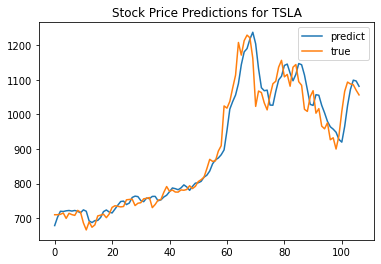

In [ ]:

def load_stock_data(company):
  path = root_dir
  stock_filename=path+company+'.csv'
  stock_df=pd.read_csv(stock_filename)
  stock_df['Date']=pd.to_datetime(stock_df['Date'])
  stock_df=stock_df[stock_df['Date']>='2019-01-01']
  stock_df=stock_df[stock_df['Date']<='2021-12-31']

  return stock_df


def load_tweets_df(company):
  path = root_dir
  tweets_file_name=path+company+'_tweets.csv'
  tweets_df=pd.read_csv(tweets_file_name,usecols=range(1,5))
  tweets_df.dropna(inplace=True)
  tweets_df['Datetime']=tweets_df['Datetime'].str.split(' ').str.get(0)
  tweets_df['Datetime']=pd.to_datetime(tweets_df['Datetime'])

  return tweets_df


def cleanText(text):
  text=re.sub(r'@[A-Za-z0-9_]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT :','',text)
  text=re.sub(r'https?://[A-Za-z0-9./]+','',text)
  text=re.sub(r'\n',' ',text)
  text=re.sub(r'  ',' ',text)

  return text

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getClass(polarity):
  if polarity<0:
    return 'negative'
  if polarity==0:
    return 'neutral'
  if polarity>0:
    return 'positive'

def mergeData(stock_df,tweets_df,split_date='2021-07-31'):
  merge_df = stock_df.copy()
  for i in range(0,len(stock_df)):
    cur_time = stock_df.iloc[i,:]['Date']
    idx = tweets_df['Datetime'] == cur_time
    tweets_sub = tweets_df.loc[idx]

    tweets_sub['len_chars'] = tweets_sub['Text'].apply(len)
    merge_df.loc[i,'len_chars'] = tweets_sub['len_chars'].mean()
    merge_df.loc[i,'polarity'] = tweets_sub['Polarity'].mean()
    merge_df.loc[i,'subjectivity'] = tweets_sub['Subjectivity'].mean()
    merge_df.loc[i,'num_positive'] = tweets_sub.loc[tweets_sub['Class']=='positive',:].shape[0]
    merge_df.loc[i,'num_negative'] = tweets_sub.loc[tweets_sub['Class']=='negative',:].shape[0]
    merge_df.loc[i,'ratio_positive'] = merge_df.loc[i,'num_positive']/tweets_sub.shape[0]
    merge_df.loc[i,'ratio_negative'] = merge_df.loc[i,'num_negative']/tweets_sub.shape[0]

  merge_df.dropna(inplace=True)
  merge_df.set_index('Date',inplace=True)

  train_df = merge_df.loc[merge_df.index<=split_date]
  test_df = merge_df.loc[merge_df.index>split_date]
  return train_df,test_df



def get_train_test_data(train_df,test_df,step_size=60,target_size=1):
    sub_col = range(train_df.shape[1])
    train_data = train_df.iloc[:,sub_col].copy()
    test_data = test_df.iloc[:,sub_col].copy()
    scaler = MinMaxScaler()
    train_data = scaler.fit_transform(train_data)
    train_data = np.array(train_data)
    X_train = []
    y_train = []
    for i in range(step_size,train_data.shape[0]-target_size):
        X_train.append(train_data[i-step_size:i]) 
        y_train.append(train_data[i:i+target_size,3])
  
        
    X_train,y_train = np.array(X_train),np.array(y_train)
    
    train_data = train_df.iloc[:,sub_col].copy()
    past_step_days = train_data.tail(step_size)
    test_data = past_step_days.append(test_data,ignore_index=True)
    test_data = scaler.transform(test_data)
    test_data = np.array(test_data)
    X_test = []
    y_test = []
    for i in range(step_size,test_data.shape[0]):
        X_test.append(test_data[i-step_size:i])
        y_test.append(test_data[i,3])
    X_test,y_test = np.array(X_test),np.array(y_test)

    return X_train,y_train,X_test,y_test,scaler


y_pred_list=[]
y_true_list=[]
company_list=['AAPL','AMZN','FB','GOOGL','MSFT','TSLA']

def build_model(hp):
    model = Sequential()
    num_hidden = hp.Int('num_hidden',min_value=0,max_value=3)

    model.add(LSTM(
        units=hp.Int('num_units',min_value=17,max_value=500,step=50),
        activation='relu',
        return_sequences=True if num_hidden>0 else False,
        input_shape=(X_train.shape[1],X_train.shape[2])
    ))
    if num_hidden>0:
        for num_layer in range(num_hidden):
            model.add(Dropout(
                hp.Float('rate_dropout_hidden'+str(num_layer+1),min_value=0.05,max_value=0.95,step=0.05)
            ))
            model.add(LSTM(
                units=hp.Int('num_units_hidden'+str(num_layer+1),min_value=17,max_value=250,step=50),
                activation='relu',
                return_sequences=True if num_layer+1!=num_hidden else False
            ))
    
    model.add(Dropout(
            hp.Float('rate_dropout',min_value=0.05,max_value=0.95,step=0.05)
        ))
    
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')

    return model

for company in company_list:
    print(company)
    ## Load Stock and Tweets Data
    stock_df = load_stock_data(company)
    tweets_df = load_tweets_df(company)
    ## Process Tweets Data
    tweets_df['Text']=tweets_df['Text'].apply(cleanText)
    tweets_df['Subjectivity']=tweets_df['Text'].apply(getSubjectivity)
    tweets_df['Polarity']=tweets_df['Text'].apply(getPolarity)
    tweets_df['Class']=tweets_df['Polarity'].apply(getClass)
    ## Merge Stock and Tweets Data
    split_date = '2021-07-31'
    train_df,test_df = mergeData(stock_df,tweets_df,split_date)
    ## Get Train and Test Data
    step_size=2
    X_train,y_train,X_test,y_test,scaler = get_train_test_data(train_df,test_df,step_size,3)
    X_train_x= X_train.reshape(X_train.shape[0], -1)
    X_test_x= X_test.reshape(X_test.shape[0], -1)
    
    ## Build Model and RandomSearch Best Hyperparameters
    tuner = RandomSearch(
        build_model,
        objective='val_loss', 
        max_trials=5,
        seed=0,   
        executions_per_trial=3,
        directory= root_dir+'Stock Price Predictions for '+company,
        project_name= root_dir+'Stock Price Predictions for '+company
        )

    callback=EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)
    tuner.search(
    x=X_train,
    y=y_train,
    verbose=1,
    epochs=100,
    batch_size=64,
    callbacks=[callback],
    validation_data=(X_test, y_test)
    )
  
    best_model = tuner.get_best_models(num_models=1)[0]
    best_model.save(company+'best_model.h5')
    print('best model for {} is saved' .format(company))
    print(best_model.summary())

    best_hyperparameters = tuner.get_best_hyperparameters()[0].values
    print(best_hyperparameters)

    best_loss = best_model.evaluate(X_test, y_test)
    print(best_loss)

    y_pred = best_model.predict(X_test)
    y_pred_df = scaler.transform(test_df)
    y_pred_df[:,3] = y_pred[:,0]
    y_pred = pd.DataFrame(scaler.inverse_transform(y_pred_df))[3]

    y_true = test_df.values[:,3]

    y_pred_list.append(y_pred)
    y_true_list.append(y_true)
    plt.plot(y_pred,label='predict')
    plt.plot(y_true,label='true')
    plt.title('Stock Price Predictions for '+company)
    plt.legend()
    plt.show()

In [ ]:
for i in range(6):
  print(mean_squared_error(y_true=y_true_list[i],
                   y_pred=y_pred_list[i]))

6.443641576188542
2758.2220278267973
52.808989228045675
2114.1357898804645
25.264590170583357
1712.917276951322


In [ ]:
pip install pmdarima

AAPL


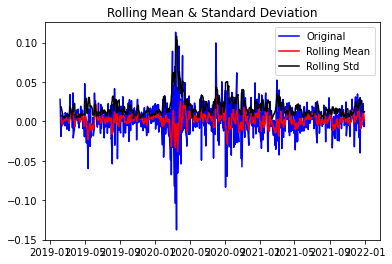

ADF Statistic: -8.41539575115401
p-value: 2.0502724727540788e-13
Critical Values:
	1%: -3.4393893552577723
	5%: -2.8655292671104644
	10%: -2.5688943376666744
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3594.530, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3576.980, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3600.193, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3598.389, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3572.623, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3598.671, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3598.699, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3596.549, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3593.112, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 5.160 seconds


NotImplementedError: ignored

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
root_dir="/content/drive/MyDrive/560 Project/Data/"
def train_test_split(timeseries, split_date ='2021-07-31' ):
  ts = timeseries.copy()

  train_df = ts.loc[ts.index <= split_date]
  test_df = ts.loc[ts.index > split_date]
  return train_df,test_df

def load_stock_data(company):
  path = root_dir
  stock_filename=path+company+'.csv'
  stock_df=pd.read_csv(stock_filename)
  stock_df['Date']=pd.to_datetime(stock_df['Date'])
  stock_df=stock_df[stock_df['Date']>='2019-01-01']
  stock_df=stock_df[stock_df['Date']<='2021-12-31']

  return stock_df

def extract_hist_price(stock_df):
  price_data = stock_df[['Date','Close']]
  price_data.Date = pd.to_datetime(price_data.Date)
  price_data = price_data.set_index('Date')
  return price_data  

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

company_list=['AAPL','AMZN','FB','GOOGL','MSFT','TSLA']

for company in company_list:
    print(company)
    ## Load Stock and Tweets Data
    stock_df = load_stock_data(company)
    stock_price = extract_hist_price(stock_df)


    price_log = np.log(stock_price)  
    price_log_shift = price_log - price_log.shift()
    price_log_shift.dropna(inplace=True)
    print(get_stationarity(price_log_shift))

    split_date = '2021-7-31'

    # train_df,test_df = train_test_split(price_log_exp_decay)
    train_df,test_df = train_test_split(price_log_shift)
    stepwise_fit = auto_arima(price_log_shift['Close'], trace=True,suppress_warnings=True)
    # print(stepwise_fit)

    # model=ARIMA(price_log_exp_decay['Close'],order=(1,0,0))
    model=ARIMA(price_log_shift['Close'],order=(2,0,0))
    model=model.fit()
    model.summary()


    start=len(train_df)
    end=len(train_df)+len(test_df)-1
    pred = model.predict(start=start,end=end).rename('ARIMA Predictions')

    shift = price_log.shift()
    shift_log_test = shift.loc[shift.index > split_date]

    ad = np.array(shift_log_test.Close)
    pred_arr = np.array(pred)
    sum_two = (pred_arr + ad) if ad != 'nan' else pred_arr
    price_pred = np.exp(sum_two)

    # true stock price
    true_test = stock_price[stock_price.index > split_date].Close


    test_df.mean()
    mse = mean_squared_error(price_pred,true_test)
    print(company ,':', mse)

    plt.plot(test_df.index, price_pred)
    plt.plot(test_df.index, true_test)
    plt.title('Stock Price Predictions for '+company)
    plt.legend()
    plt.show()


AAPL


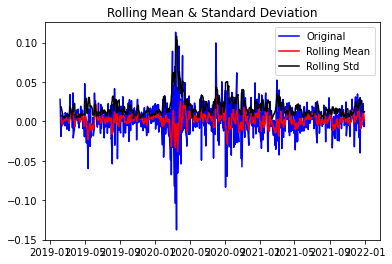

ADF Statistic: -8.41539575115401
p-value: 2.0502724727540788e-13
Critical Values:
	1%: -3.4393893552577723
	5%: -2.8655292671104644
	10%: -2.5688943376666744
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3594.530, Time=2.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3576.980, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3600.193, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3598.389, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3572.623, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3598.671, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3598.699, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3596.549, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3593.112, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.034 seconds


No handles with labels found to put in legend.


AAPL : 5.292581688815077


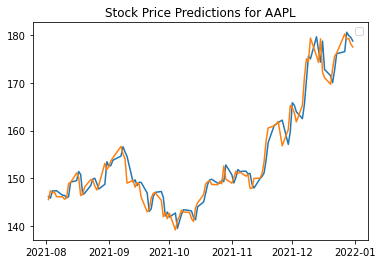

AMZN


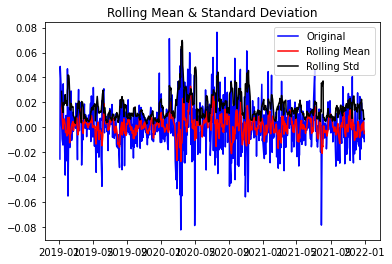

ADF Statistic: -29.37409247928389
p-value: 0.0
Critical Values:
	1%: -3.4390409569041207
	5%: -2.865375732701395
	10%: -2.568812543748081
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3881.633, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3885.543, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3886.937, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3886.931, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3885.230, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3884.940, Time=0.95 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3885.037, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3882.937, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3886.285, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 3.188 seconds


No handles with labels found to put in legend.


AMZN : 2291.427759685709


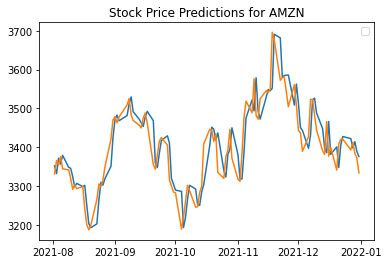

FB


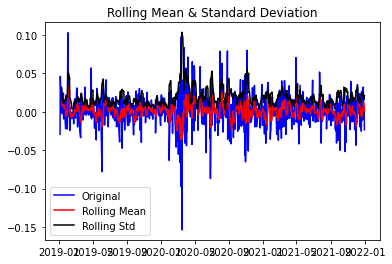

ADF Statistic: -9.508438510601422
p-value: 3.298745696854149e-16
Critical Values:
	1%: -3.439134355513998
	5%: -2.865416893922985
	10%: -2.56883447171999
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3607.039, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3603.531, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3611.745, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3611.051, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3603.334, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3610.752, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3611.469, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3608.582, Time=0.87 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3610.947, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.856 seconds


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

def train_test_split(timeseries, split_date ='2021-07-31' ):
  ts = timeseries.copy()

  train_df = ts.loc[ts.index <= split_date]
  test_df = ts.loc[ts.index > split_date]
  return train_df,test_df

def load_stock_data(company):
  path = root_dir
  stock_filename=path+company+'.csv'
  stock_df=pd.read_csv(stock_filename)
  stock_df['Date']=pd.to_datetime(stock_df['Date'])
  stock_df=stock_df[stock_df['Date']>='2019-01-01']
  stock_df=stock_df[stock_df['Date']<='2021-12-31']

  return stock_df

def extract_hist_price(stock_df):
  price_data = stock_df[['Date','Close']]
  price_data.Date = pd.to_datetime(price_data.Date)
  price_data = price_data.set_index('Date')
  return price_data  

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

company_list=['AAPL','AMZN','FB','GOOGL','MSFT','TSLA']

for company in company_list:
    print(company)
    ## Load Stock and Tweets Data
    stock_df = load_stock_data(company)
    stock_price = extract_hist_price(stock_df)


    price_log = np.log(stock_price)  
    price_log_shift = price_log - price_log.shift()
    price_log_shift.dropna(inplace=True)
    print(get_stationarity(price_log_shift))

    split_date = '2021-7-31'

    # train_df,test_df = train_test_split(price_log_exp_decay)
    train_df,test_df = train_test_split(price_log_shift)
    stepwise_fit = auto_arima(price_log_shift['Close'], trace=True,suppress_warnings=True)
    # print(stepwise_fit)

    # model=ARIMA(price_log_exp_decay['Close'],order=(1,0,0))
    model=sm.tsa.ARIMA(price_log_shift['Close'],order=(1,0,0))
    model=model.fit()
    model.summary()

    train_ar = train_df['Close'].values
    test_ar = test_df['Close'].values

    # https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
    history = [x for x in train_ar]
    predictions = list()
    for t in range(0,len(test_ar),2):
        model = sm.tsa.ARIMA(history, order=(2,0,2))
        model_fit = model.fit()
        output = model_fit.forecast(steps=2)
        output=list(output)

        if(t<len(test_ar)):
          yhat1,yhat2 = output[0],output[1]
          predictions.append(yhat1)
          
          obs1= test_ar[t]
          history.append(obs1)
          if(t+1<len(test_ar)):
            obs2=test_ar[t+1]
            history.append(obs2)
            predictions.append(yhat2)
          #print('predicted=%f, expected=%f' % (yhat1, obs1))
    shift = price_log.shift()
    shift_log_test = shift.loc[shift.index > split_date]

    ad = np.array(shift_log_test.Close)
    pred_arr = np.array(predictions)
    sum_two = (pred_arr + ad) if ad != 'nan' else pred_arr
    price_pred = np.exp(sum_two)

    # true stock price
    true_test = stock_price[stock_price.index > split_date].Close


    test_df.mean()
    mse = mean_squared_error(price_pred,true_test)
    print(company ,':', mse)

    plt.plot(test_df.index, price_pred)
    plt.plot(test_df.index, true_test)
    plt.title('Stock Price Predictions for '+company)
    plt.legend()
    plt.show()

    # error = mean_squared_error(test_ar, predictions)
    # print('Testing Mean Squared Error: %.3f' % error)


AAPL


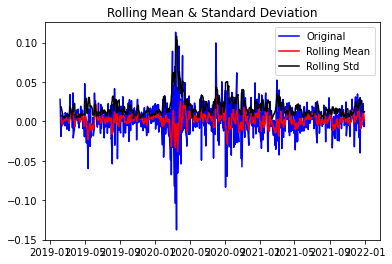

ADF Statistic: -8.41539575115401
p-value: 2.0502724727540788e-13
Critical Values:
	1%: -3.4393893552577723
	5%: -2.8655292671104644
	10%: -2.5688943376666744
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3594.530, Time=2.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3576.980, Time=0.66 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3600.193, Time=0.84 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3598.389, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3572.623, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3598.671, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3598.699, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3596.549, Time=0.78 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3593.112, Time=0.17 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.040 seconds
<class 'list'>


No handles with labels found to put in legend.


AAPL : 5.048476995492803


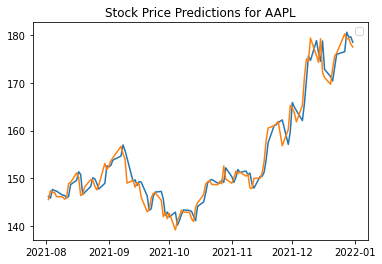

AMZN


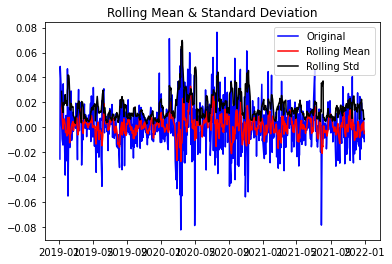

ADF Statistic: -29.37409247928389
p-value: 0.0
Critical Values:
	1%: -3.4390409569041207
	5%: -2.865375732701395
	10%: -2.568812543748081
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3881.633, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3885.543, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3886.937, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3886.931, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3885.230, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3884.940, Time=0.92 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3885.037, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3882.937, Time=1.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3886.285, Time=0.16 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 4.264 seconds
<class 'list'>


No handles with labels found to put in legend.


AMZN : 2252.8928924633333


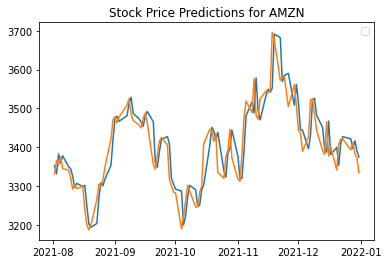

FB


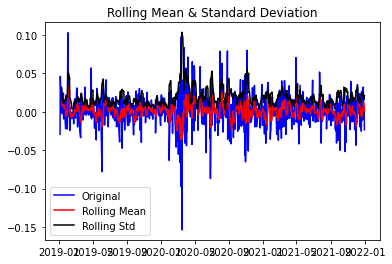

ADF Statistic: -9.508438510601422
p-value: 3.298745696854149e-16
Critical Values:
	1%: -3.439134355513998
	5%: -2.865416893922985
	10%: -2.56883447171999
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3607.039, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3603.531, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3611.745, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3611.051, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3603.334, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3610.752, Time=1.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3611.469, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3608.582, Time=1.56 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3610.947, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 4.947 seconds
<class 'list'>


No handles with labels found to put in legend.


FB : 36.370398914378725


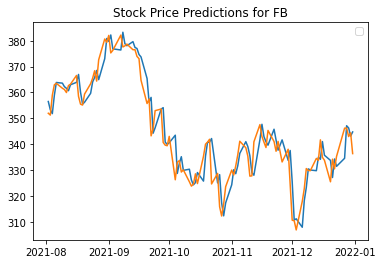

GOOGL


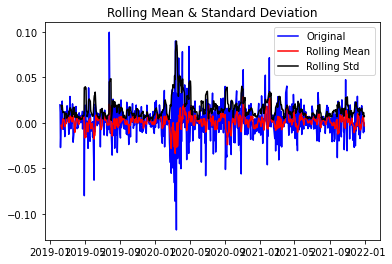

ADF Statistic: -6.035141465724723
p-value: 1.3878231658342596e-07
Critical Values:
	1%: -3.439477677285233
	5%: -2.865568186630048
	10%: -2.5689150720653977
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3787.468, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3770.467, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3792.882, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3791.082, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3768.856, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3791.445, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3791.482, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3789.001, Time=1.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3789.723, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.393 seconds
<class 'list'>


No handles with labels found to put in legend.


GOOGL : 1414.2012384771147


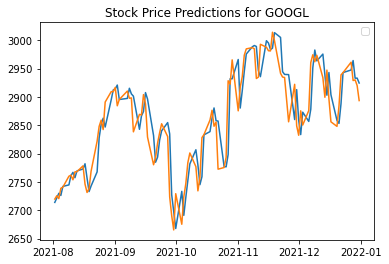

MSFT


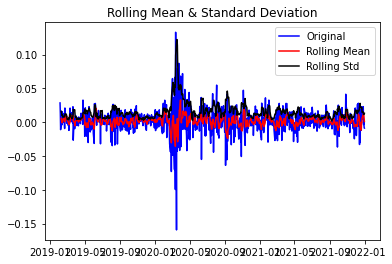

ADF Statistic: -8.494418344052121
p-value: 1.287380955701551e-13
Critical Values:
	1%: -3.4393893552577723
	5%: -2.8655292671104644
	10%: -2.5688943376666744
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3798.215, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3726.237, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3799.834, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3789.799, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3723.030, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3798.156, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3798.069, Time=0.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3796.422, Time=0.94 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3792.056, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 5.107 seconds
<class 'list'>


No handles with labels found to put in legend.


MSFT : 16.895819582322915


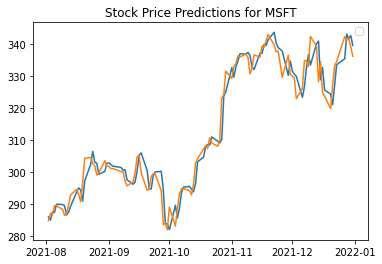

TSLA


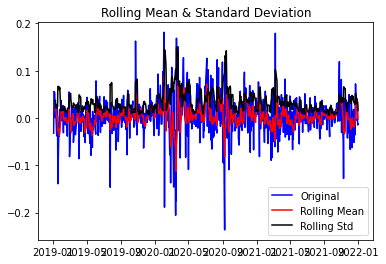

ADF Statistic: -14.470745788621864
p-value: 6.611764370577055e-27
Critical Values:
	1%: -3.4390641198617864
	5%: -2.8653859408474482
	10%: -2.5688179819544312
None
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2637.979, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2639.407, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2637.456, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2637.452, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2635.436, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2635.454, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.700 seconds
<class 'list'>


No handles with labels found to put in legend.


TSLA : 1005.6365099486364


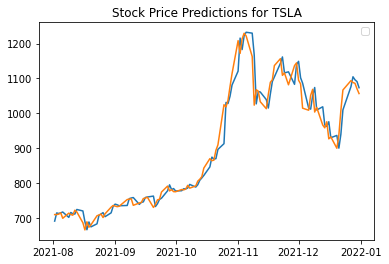

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

def train_test_split(timeseries, split_date ='2021-07-31' ):
  ts = timeseries.copy()

  train_df = ts.loc[ts.index <= split_date]
  test_df = ts.loc[ts.index > split_date]
  return train_df,test_df

def load_stock_data(company):
  path = root_dir
  stock_filename=path+company+'.csv'
  stock_df=pd.read_csv(stock_filename)
  stock_df['Date']=pd.to_datetime(stock_df['Date'])
  stock_df=stock_df[stock_df['Date']>='2019-01-01']
  stock_df=stock_df[stock_df['Date']<='2021-12-31']

  return stock_df

def extract_hist_price(stock_df):
  price_data = stock_df[['Date','Close']]
  price_data.Date = pd.to_datetime(price_data.Date)
  price_data = price_data.set_index('Date')
  return price_data  

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

company_list=['AAPL','AMZN','FB','GOOGL','MSFT','TSLA']

for company in company_list:
    print(company)
    ## Load Stock and Tweets Data
    stock_df = load_stock_data(company)
    stock_price = extract_hist_price(stock_df)


    price_log = np.log(stock_price)  
    price_log_shift = price_log - price_log.shift()
    price_log_shift.dropna(inplace=True)
    print(get_stationarity(price_log_shift))

    split_date = '2021-7-31'

    # train_df,test_df = train_test_split(price_log_exp_decay)
    train_df,test_df = train_test_split(price_log_shift)
    stepwise_fit = auto_arima(price_log_shift['Close'], trace=True,suppress_warnings=True)
    # print(stepwise_fit)

    # model=ARIMA(price_log_exp_decay['Close'],order=(1,0,0))
    model=sm.tsa.ARIMA(price_log_shift['Close'],order=(3,0,0))
    model=model.fit()
    model.summary()

    train_ar = train_df['Close'].values
    test_ar = test_df['Close'].values

    # https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
    history = [x for x in train_ar]
    print(type(history))
    predictions = list()
    for t in range(0,len(test_ar),3):
        model = sm.tsa.ARIMA(history, order=(3,0,0))
        model_fit = model.fit()
        output = model_fit.forecast(steps=3)
        if(t<len(test_ar)):
          yhat1,yhat2,yhat3 = output[0],output[1],output[2]
          predictions.append(yhat1)
          
          obs1= test_ar[t]
          history.append(obs1)
          if(t+1<len(test_ar)):
            obs2=test_ar[t+1]
            history.append(obs2)
            predictions.append(yhat2)
            if(t+2<len(test_ar)):
              obs3=test_ar[t+2]
              history.append(obs3)
              predictions.append(yhat3)

          #print('predicted=%f, expected=%f' % (yhat1, obs1))

    shift = price_log.shift()
    shift_log_test = shift.loc[shift.index > split_date]

    ad = np.array(shift_log_test.Close)
    pred_arr = np.array(predictions)
    sum_two = (pred_arr + ad) if ad != 'nan' else pred_arr
    price_pred = np.exp(sum_two)

    # true stock price
    true_test = stock_price[stock_price.index > split_date].Close


    test_df.mean()
    mse = mean_squared_error(price_pred,true_test)
    print(company ,':', mse)

    plt.plot(test_df.index, price_pred)
    plt.plot(test_df.index, true_test)
    plt.title('Stock Price Predictions for '+company)
    plt.legend()
    plt.show()

# Pickle

In [ ]:
import pickle

In [ ]:
with open('1day.pkl', 'wb') as files:
  pickle.dump(, files)